# Open-Ended Response Analysis Setup

## Importing Libraries & Data

In [19]:
# Importing Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
sns.set(style = "whitegrid",
        color_codes = True,
        font_scale = 1.5)
import re
import pandas as pd
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


24: How comfortable do you feel connecting with others (peers, staff, faculty) in BSOE? Do you have any concerns about forming connections?


26: How comfortable do you feel connecting with others (peers, staff, faculty) at UC Santa Cruz? Do you have any concerns about forming connections?


34: How do you feel about navigating social connections (with peers, staff, and faculty) in BSOE?


38: How do you feel about navigating social connections (with peers, staff, and faculty) at UC Santa Cruz more broadly?

In [3]:
from google.colab import drive
drive.mount('/content/drive')
post_2020_qualitative = pd.read_excel('/content/drive/My Drive/BEES Research Data/Data for Studies/2020 Post Survey.xlsx').iloc[1:].set_index('ResponseId')[["Q24", "Q26", "Q34", "Q38"]]
post_2021_qualitative = pd.read_excel('/content/drive/My Drive/BEES Research Data/Data for Studies/2021 Post Survey.xlsx').iloc[1:].set_index('ResponseId')[["Q24", "Q26", "Q34", "Q38"]]
post_2022_qualitative = pd.read_excel('/content/drive/My Drive/BEES Research Data/Data for Studies/2022 Post Survey.xlsx').iloc[1:].set_index('ResponseId')[["Q24", "Q26", "Q34", "Q38"]]
post_2023_qualitative = pd.read_excel('/content/drive/My Drive/BEES Research Data/Data for Studies/2023 Post Survey.xlsx').iloc[1:].set_index('ResponseId')[["Q24", "Q26", "Q34", "Q38"]]

Mounted at /content/drive


## Sentiment Analysis

In [4]:
# for sentiment score for each text
def get_sentiment_score(text):
  sia = SentimentIntensityAnalyzer()
  if isinstance(text, str):
    return sia.polarity_scores(text)['compound']
  else:
    return

def sentiment_analysis(df):
  # Calculate sentiment scores for each column
  sentiment_scores = {}
  for column in df.columns:
      sentiment_scores[column] = df[column].apply(get_sentiment_score)

  # Convert sentiment scores dictionary to a DataFrame
  sentiment_df = pd.DataFrame(sentiment_scores)
  sentiment_df.index=df.index
  return sentiment_df

In [5]:
online_sentiments = pd.concat([sentiment_analysis(post_2020_qualitative), sentiment_analysis(post_2021_qualitative)])
offline_sentiments = pd.concat([sentiment_analysis(post_2022_qualitative), sentiment_analysis(post_2023_qualitative)])

### Online

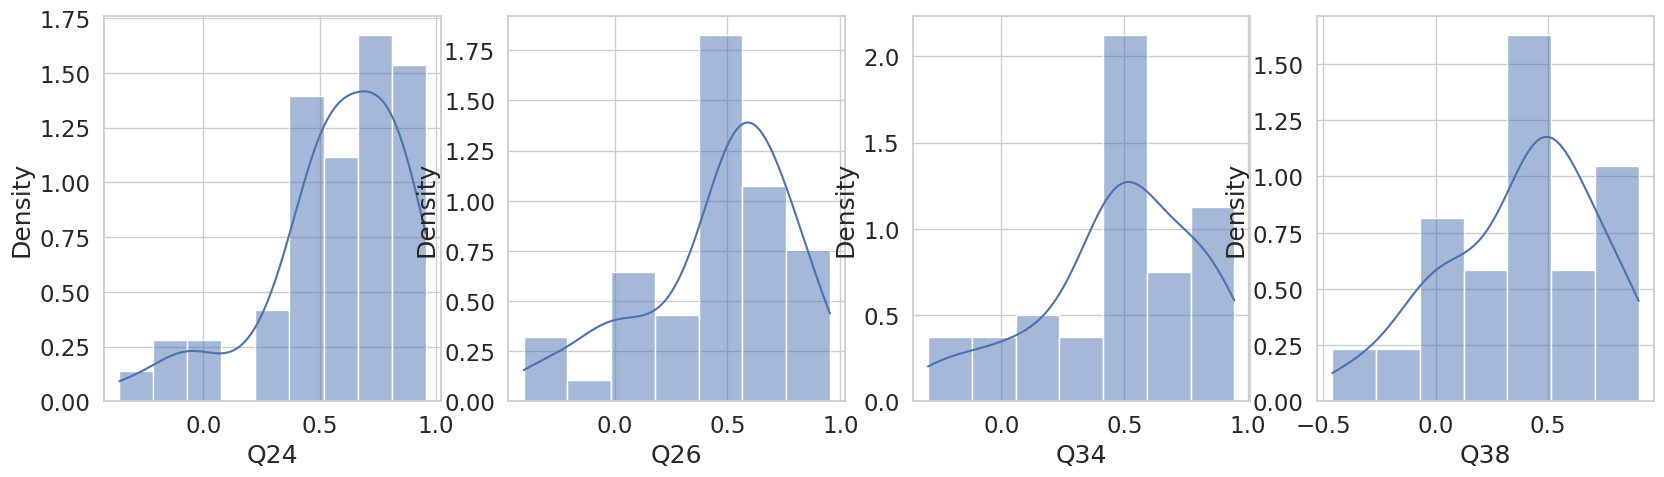

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=len(online_sentiments.columns), figsize=(20, 5))
for idx, column in enumerate(online_sentiments.columns):
  sns.histplot(data = online_sentiments, x=column, ax=axes[idx], kde=True, stat="density")

### Offline

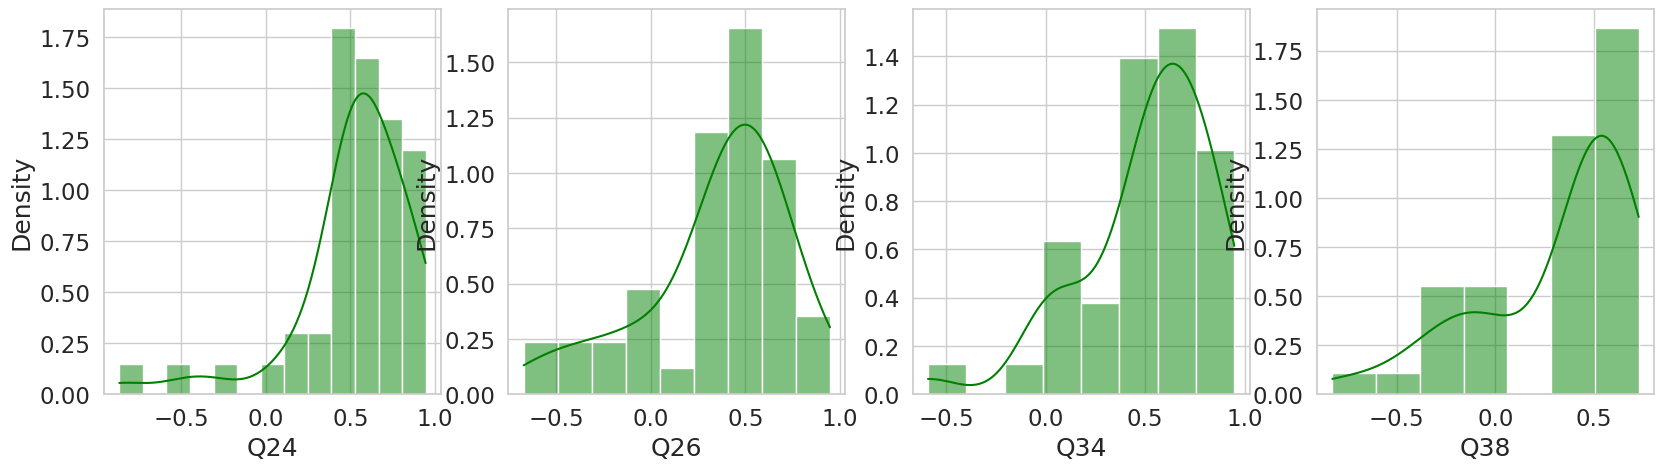

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=len(offline_sentiments.columns), figsize=(20, 5))
for idx, column in enumerate(offline_sentiments.columns):
  sns.histplot(data = offline_sentiments, x=column, ax=axes[idx], kde=True, stat="density", color="green")

In [8]:
online_sentiments.median()

Q24    0.59740
Q26    0.54875
Q34    0.51060
Q38    0.45660
dtype: float64

In [9]:
offline_sentiments.median()

Q24    0.5563
Q26    0.4588
Q34    0.5563
Q38    0.4927
dtype: float64

## Word Clouds

46: In what ways did BEES Summer Academy help you?


48: In what ways was the academy not helpful to you? What would have been more helpful?

In [28]:
post_2020_good = pd.read_excel('/content/drive/My Drive/BEES Research Data/Data for Studies/2020 Post Survey.xlsx').iloc[1:].set_index('ResponseId')[["Q46"]]
post_2020_bad = pd.read_excel('/content/drive/My Drive/BEES Research Data/Data for Studies/2020 Post Survey.xlsx').iloc[1:].set_index('ResponseId')[["Q48"]]
post_2021_good = pd.read_excel('/content/drive/My Drive/BEES Research Data/Data for Studies/2021 Post Survey.xlsx').iloc[1:].set_index('ResponseId')[["Q46"]]
post_2021_bad = pd.read_excel('/content/drive/My Drive/BEES Research Data/Data for Studies/2021 Post Survey.xlsx').iloc[1:].set_index('ResponseId')[["Q48"]]
post_2022_good =pd.read_excel('/content/drive/My Drive/BEES Research Data/Data for Studies/2022 Post Survey.xlsx').iloc[1:].set_index('ResponseId')[["Q46"]]
post_2022_bad = pd.read_excel('/content/drive/My Drive/BEES Research Data/Data for Studies/2022 Post Survey.xlsx').iloc[1:].set_index('ResponseId')[["Q48"]]
post_2023_good = pd.read_excel('/content/drive/My Drive/BEES Research Data/Data for Studies/2023 Post Survey.xlsx').iloc[1:].set_index('ResponseId')[["Q46"]]
post_2023_bad = pd.read_excel('/content/drive/My Drive/BEES Research Data/Data for Studies/2023 Post Survey.xlsx').iloc[1:].set_index('ResponseId')[["Q48"]]
online_good = pd.concat([post_2020_good, post_2021_good])
online_bad = pd.concat([post_2020_bad, post_2021_bad])
offline_good = pd.concat([post_2022_good, post_2023_good])
offline_bad = pd.concat([post_2022_bad, post_2023_bad])

### Online - GOOD feedback (Included in Thesis)

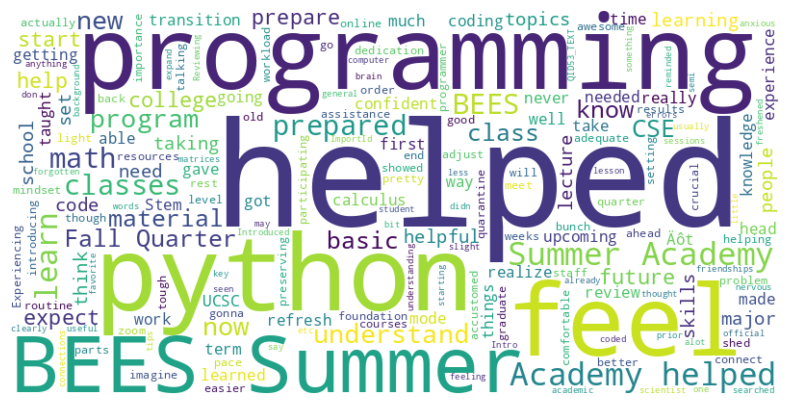

In [29]:
# Concatenate all columns into a single string
text = ' '.join(online_good.apply(lambda x: ' '.join(x.dropna().astype(str)), axis=0))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Offline - GOOD feedback (Included in Thesis)

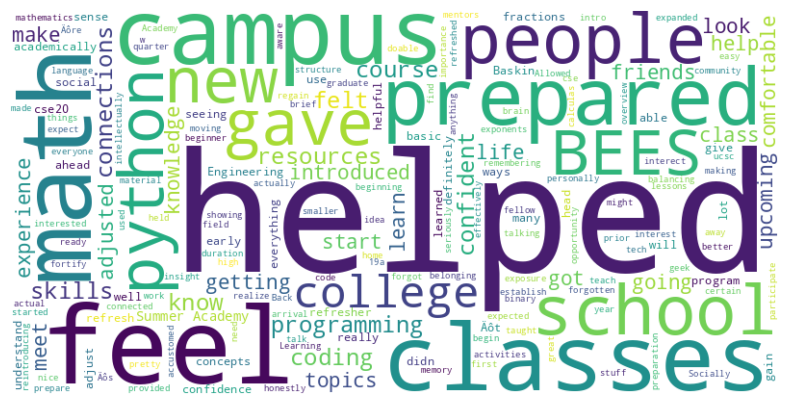

In [30]:
# Concatenate all columns into a single string
text = ' '.join(offline_good.apply(lambda x: ' '.join(x.dropna().astype(str)), axis=0))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## (Interesting) Word Clouds not Included in Thesis

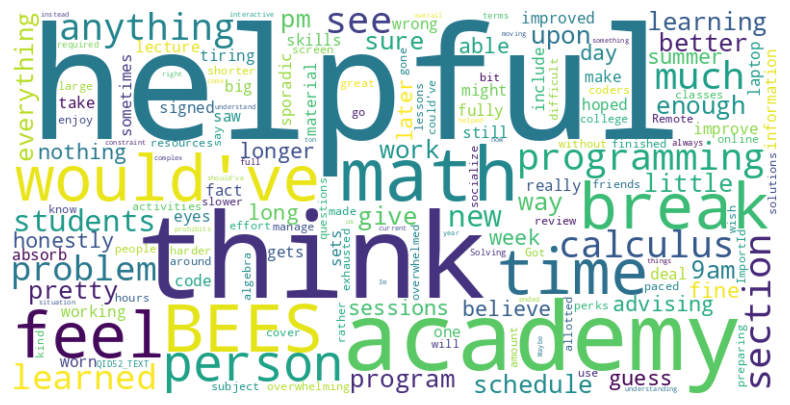

In [22]:
# Concatenate all columns into a single string
text = ' '.join(online_bad.apply(lambda x: ' '.join(x.dropna().astype(str)), axis=0))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

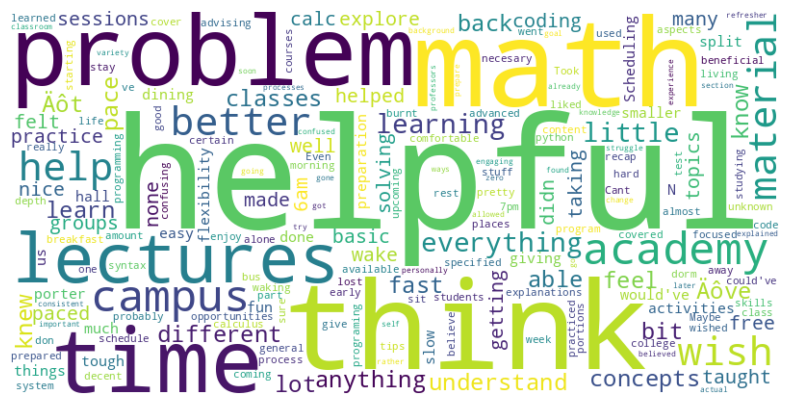

In [23]:
# Concatenate all columns into a single string
text = ' '.join(offline_bad.apply(lambda x: ' '.join(x.dropna().astype(str)), axis=0))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
online_responses=pd.concat([post_2020_qualitative, post_2021_qualitative])
offline_responses= pd.concat([post_2022_qualitative, post_2023_qualitative])

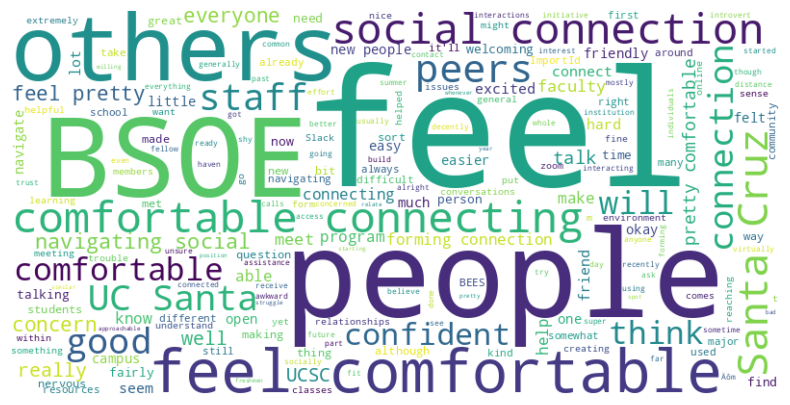

In [27]:
# Concatenate all columns into a single string
text = ' '.join(online_responses.apply(lambda x: ' '.join(x.dropna().astype(str)), axis=0))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

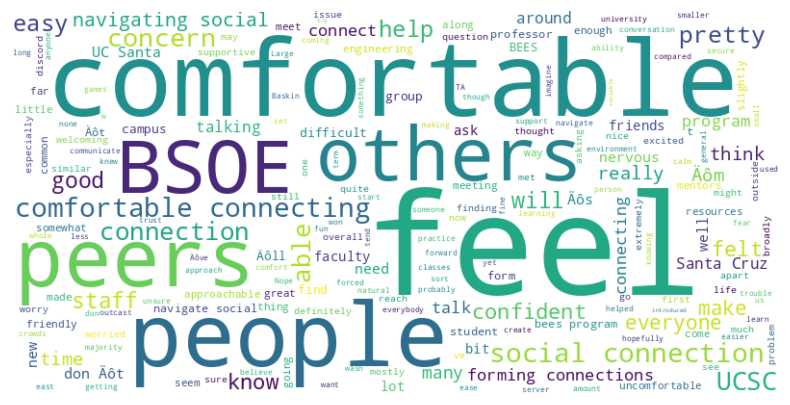

In [26]:
# Concatenate all columns into a single string
text = ' '.join(offline_responses.apply(lambda x: ' '.join(x.dropna().astype(str)), axis=0))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()